In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## directory to all datasets
DATASETS_DIR = "../datasets_text/"
BASE_DIR ="../"
train_dir = os.path.join(BASE_DIR, 'TRAIN')

test_dir =os.path.join(BASE_DIR,'TEST')


In [9]:
datasets = os.listdir(DATASETS_DIR)
del datasets[1]
datasets

['dataset28.txt',
 'dataset10.txt',
 'dataset22.txt',
 'dataset11.txt',
 'dataset13.txt',
 'dataset12.txt',
 'dataset4.txt',
 'dataset5.txt',
 'dataset3.txt',
 'dataset24.txt',
 'dataset26.txt',
 'dataset16.txt',
 'dataset8.txt',
 'dataset20.txt',
 'dataset6.txt',
 'dataset25.txt',
 'dataset1.txt',
 'dataset9.txt',
 'dataset18.txt',
 'dataset7.txt',
 'dataset15.txt',
 'dataset19.txt',
 'dataset27.txt',
 'dataset23.txt',
 'dataset2.txt',
 'dataset17.txt',
 'dataset21.txt',
 'dataset14.txt']

In [10]:
def generate_data(data_list):
    generated_data =np.zeros((2048,28),dtype=complex)
    for i,fname in enumerate(data_list):
        with open(os.path.join(DATASETS_DIR,fname)) as f:
            j=0
            for line in f:
                line = line.strip()
                if line:
                    data = line.split()
                    real_part = data[0]
                    imag_part =data[1]
                    complex_signal = complex(float(real_part),float(imag_part))
                    generated_data[j,i]=complex_signal
                j = j+1
        f.close()
    return generated_data

In [11]:
sample = generate_data(datasets)

In [12]:
sample.shape

(2048, 28)

/home/dronny/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


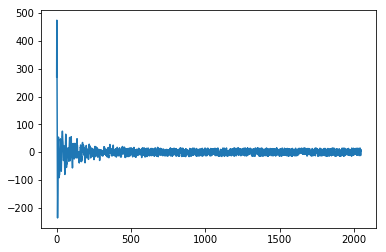

In [13]:
plt.plot(sample[:,20])

In [14]:
#Conversion from time domain to frequency domain
def td_2_fd():
    f_domain = []
    for a in np.arange(sample.shape[1]):
        fft_data =np.fft.fft(sample[:,a])
        f_domain.append(fft_data)
    return np.asarray(f_domain)

In [15]:
fft =td_2_fd()

In [16]:
fd_ffts = fft.T

In [17]:
fd_ffts.shape

(2048, 28)

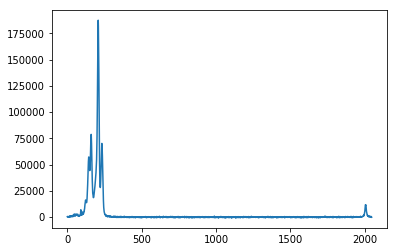

In [18]:
plt.plot((fd_ffts[:,0]))

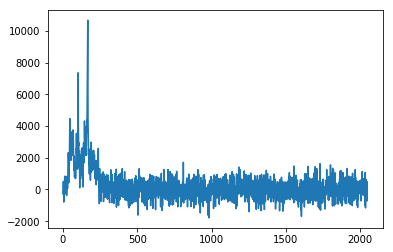

In [19]:
plt.plot(fd_ffts[:,27])

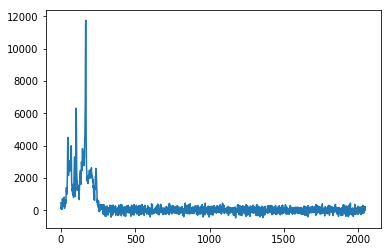

In [20]:
plt.plot(fd_ffts[:,7])

In [28]:
def normalize_ffts(ffts):
    for i in np.arange(ffts.shape[1]):
        ffts[:,i] -= ffts[:,i].mean()
        ffts[:,i] /= ffts.std()
    return ffts

In [29]:
normalized =normalize_ffts(fd_ffts)
normalized.shape

(2048, 28)

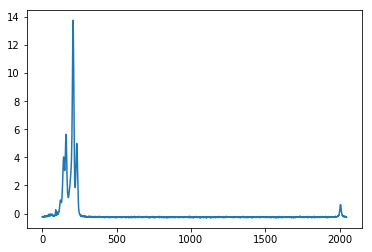

In [25]:
plt.plot(normalized[:,0])

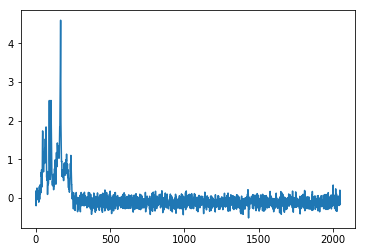

In [26]:
plt.plot(normalized[:,21])

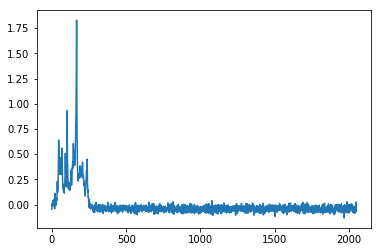

In [27]:
plt.plot(normalized[:,1])

In [30]:
normalized

array([[-2.07437513e-01+0.7285571j , -4.33136225e-02+0.27494683j,
        -1.50111167e-01+0.21404456j, ...,  2.20199545e-01+1.26424492j,
        -2.17426621e-01+2.65924492j, -1.16280318e+00+2.65890209j],
       [-2.18782521e-01+0.72495599j,  1.87724903e-04+0.25637134j,
        -1.60037031e-01+0.21796206j, ..., -1.06449834e+00+2.33892974j,
        -1.96866723e-01+2.81923927j, -7.38969327e-01+6.07895084j],
       [-2.39173308e-01+0.77757168j, -8.38248973e-03+0.25845329j,
        -1.45081404e-01+0.21794171j, ..., -8.02003869e-01+1.79080462j,
         3.17434103e-02+2.76029572j, -6.79546554e-01+4.20829745j],
       ...,
       [-1.99625103e-01+0.69045642j, -5.82154588e-02+0.26746149j,
        -1.41722515e-01+0.19064318j, ..., -3.84991125e-01+2.75491541j,
        -1.45129735e-01+2.8168001j , -2.22240248e+00+3.3261165j ],
       [-2.21905597e-01+0.6859428j ,  2.34085172e-02+0.2334129j ,
        -1.33708498e-01+0.2217218j , ..., -1.07852304e+00+1.65906752j,
        -2.07293970e-01+2.57315787j